In [126]:
import pandas as pd
from WindPy import w
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
%matplotlib inline

In [127]:
df = pd.read_excel('./data2.xlsx')

In [128]:
df.head()

,000300.SH,wind_code,IF,基差
2013-01-04,2535.985,IF1302.CFE,2547.0,11.015
2013-01-07,2525.330,IF1302.CFE,2548.4,23.070
2013-01-08,2526.126,IF1302.CFE,2544.0,17.874
2013-01-09,2530.569,IF1302.CFE,2537.0,6.431
2013-01-10,2483.230,IF1302.CFE,2549.2,65.970


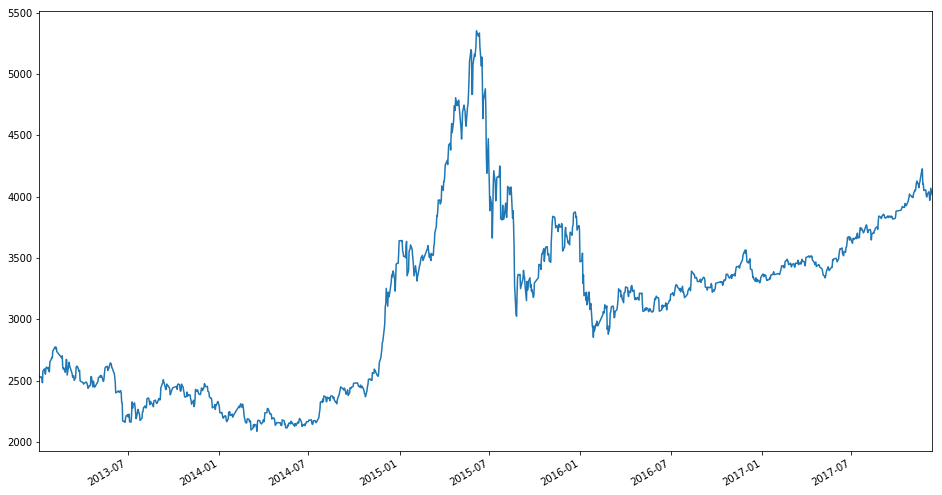

In [130]:
plt.figure(figsize=(16, 9))
df['000300.SH'].plot()

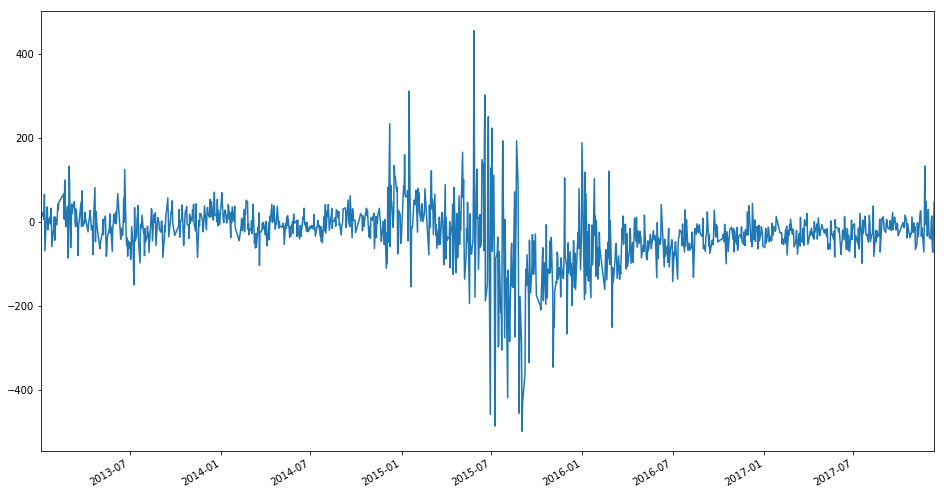

In [131]:
plt.figure(figsize=(16, 9))
df[u'基差'].plot()

In [132]:
df[u'基差的差'] = df[u'基差'].diff()

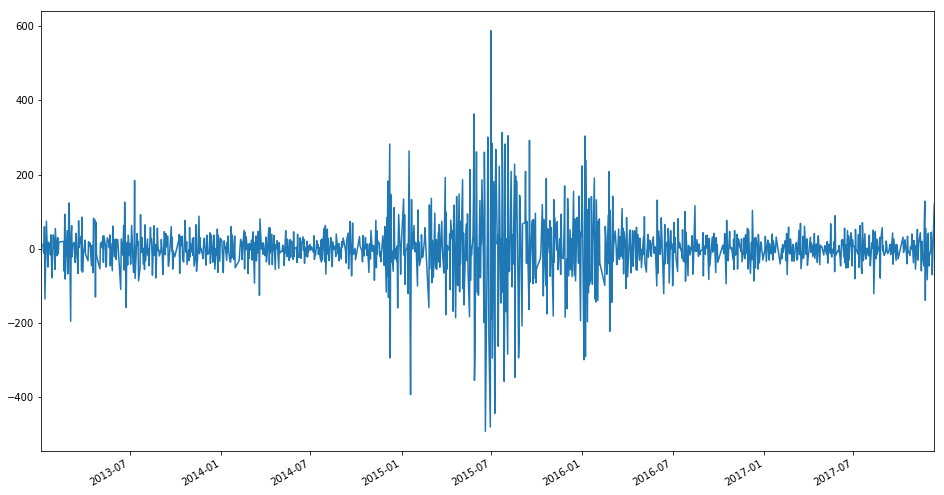

In [133]:
plt.figure(figsize=(16, 9))
df[u'基差的差'].plot()

In [135]:
df[u'短期基差变化'] = df[u'基差的差'].rolling(window=10).mean()
df[u'长期基差变化'] = df[u'基差的差'].rolling(window=30).mean()

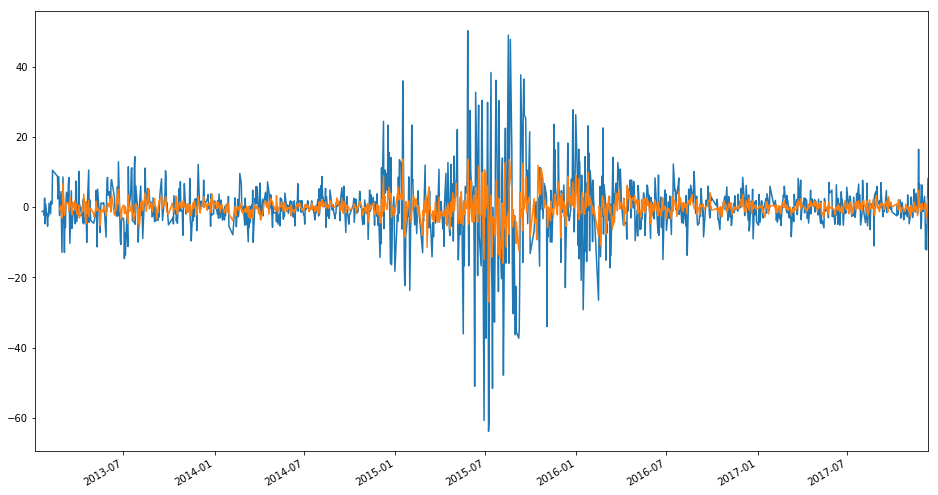

In [136]:
plt.figure(figsize=(16, 9))
df[u'短期基差变化'].plot()
df[u'长期基差变化'].plot()

In [137]:
strategy = df.dropna().copy()

In [138]:
bought = False
flag = 0
strategy['signal'] = 0
strategy['hold'] = 0
prev_diff = 100.
for date in strategy.index:
    strategy['signal'][date] = flag
    strategy['hold'][date] = 1 if bought else 0
    diff = df.loc[date][u'短期基差变化'] - df.loc[date][u'长期基差变化']
    if not bought and diff > 0 and prev_diff < 0:
        bought = True
        flag = 1
    elif bought and diff < 0 and prev_diff > 0:
        bought = False
        flag = -1
#         print date, df.loc[date][u'短期基差变化'], df.loc[date][u'长期基差变化'], diff, prev_diff
#         break
    else:
        flag = 0
    prev_diff = diff

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
strategy

,000300.SH,wind_code,IF,基差,基差的差,短期基差变化,长期基差变化,signal,hold
2013-02-22,2604.9600,IF1303.CFE,2593.2,-11.7600,-30.3560,-2.31320,-0.759167,0,0
2013-02-25,2567.5950,IF1303.CFE,2605.0,37.4050,49.1650,4.46800,0.477833,0,0
2013-02-26,2594.6770,IF1303.CFE,2564.6,-30.0770,-67.4820,-4.24330,-1.598367,1,1
2013-02-27,2673.3270,IF1303.CFE,2587.6,-85.7270,-55.6500,-12.82570,-3.071933,-1,0
2013-02-28,2668.8360,IF1303.CFE,2678.4,9.5640,95.2910,-1.91110,-1.880200,0,0
2013-03-01,2545.7150,IF1304.CFE,2679.0,133.2850,123.7210,8.65560,6.740333,0,0
2013-03-04,2622.8070,IF1304.CFE,2561.2,-61.6070,-194.8920,-12.84010,-2.245033,1,1
2013-03-05,2650.2020,IF1304.CFE,2630.0,-20.2020,41.4050,-2.67670,-1.870333,-1,0
2013-03-06,2619.4790,IF1304.CFE,2661.8,42.3210,62.5230,-5.75300,0.402633,0,0
2013-03-07,2606.9270,IF1304.CFE,2627.8,20.8730,-21.4480,0.22770,1.317067,0,0


In [141]:
ret = strategy['000300.SH'].pct_change() * strategy['hold']

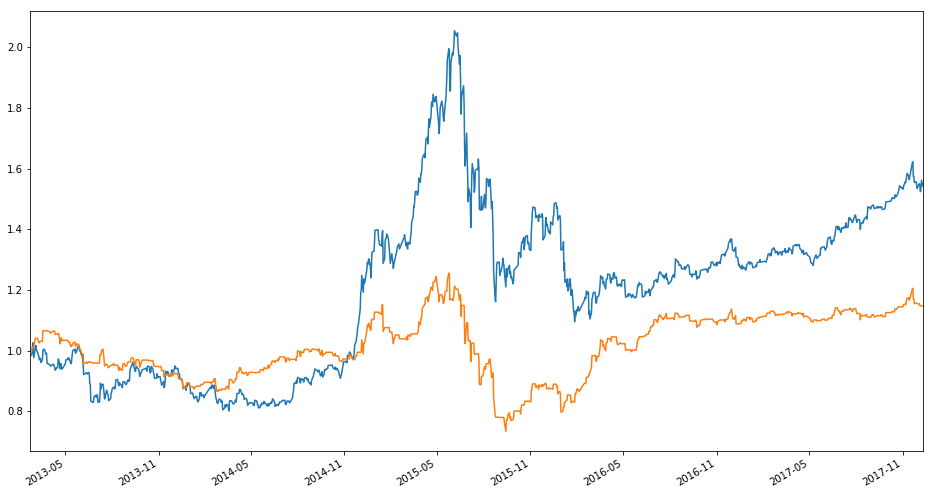

In [143]:
plt.figure(figsize=(16, 9))
(1 + strategy['000300.SH'].pct_change()).cumprod().plot()
(1 + ret).cumprod().plot()

In [87]:
strategy.to_excel('./strategy.xlsx')